=== Newton-Raphson Method Solver ===
Equation: f(x) = x³ - 4x - 9

✅ Root found: x = 2.706528


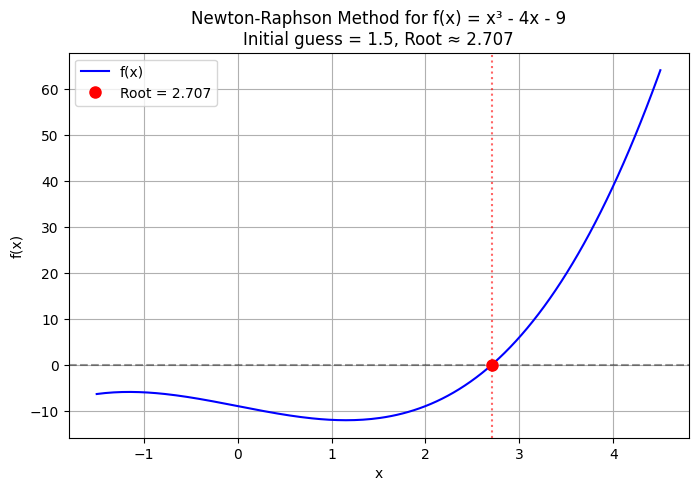

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Newton-Raphson Method (Recursive)
# ===============================

def f(x):
    """Example function: f(x) = x^3 - 4x - 9"""
    return x**3 - 4*x - 9

def f_prime(x):
    """Derivative of f(x)"""
    return 3*x**2 - 4

def newton(x, tol=1e-5, max_iter=100, iteration=0):
    """Recursive Newton-Raphson implementation with safety checks"""
    if iteration > max_iter:
        print("⚠️  Maximum iterations reached. Try another initial guess.")
        return None
    fx = f(x)
    fpx = f_prime(x)
    if abs(fpx) < 1e-10:
        print("❌ Derivative is too small — division by zero risk!")
        return None
    if abs(fx) < tol:
        return x
    return newton(x - fx / fpx, tol, max_iter, iteration + 1)


# ===============================
# User Input Section
# ===============================
print("=== Newton-Raphson Method Solver ===")
print("Equation: f(x) = x³ - 4x - 9")

try:
    x0 = float(input("Enter initial guess (e.g., 2.5): "))
    tol = float(input("Enter tolerance (default 1e-5): ") or "1e-5")
except ValueError:
    print("❌ Invalid input! Please enter numeric values.")
    exit()

root = newton(x0, tol)
if root is not None:
    print(f"\n✅ Root found: x = {root:.6f}")
else:
    exit()


# ===============================
# Plotting Section
# ===============================
x = np.linspace(x0 - 3, x0 + 3, 200)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', label='f(x)')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
plt.axvline(x=root, color='r', linestyle=':', alpha=0.6)
plt.plot(root, 0, 'ro', markersize=8, label=f'Root = {root:.3f}')
plt.title(f"Newton-Raphson Method for f(x) = x³ - 4x - 9\nInitial guess = {x0}, Root ≈ {root:.3f}")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


=== Fixed Point Iteration Method Solver ===
Equation: f(x) = x³ - 4x - 9
Rearranged as: x = (9 + 4x)^(1/3)

✅ Root found: x = 2.706527


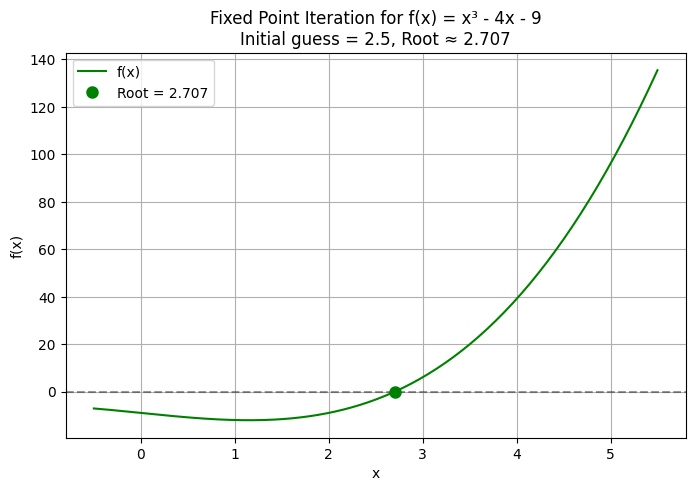

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# Fixed Point Iteration Method
# ======================================

def f(x):
    """Equation: f(x) = x³ - 4x - 9"""
    return x**3 - 4*x - 9

def g(x):
    """Rearranged form: x = g(x)"""
    return (9 + 4*x)**(1/3)

def fixed_point(x, tol=1e-5, max_iter=1000, iteration=0):
    """Recursive Fixed Point Iteration"""
    if iteration > max_iter:
        print("⚠️ Maximum iterations reached. Try another initial guess or g(x) form.")
        return None

    next_x = g(x)
    if abs(next_x - x) < tol:
        return next_x
    return fixed_point(next_x, tol, max_iter, iteration + 1)

# ======================================
# User Input Section
# ======================================
print("=== Fixed Point Iteration Method Solver ===")
print("Equation: f(x) = x³ - 4x - 9")
print("Rearranged as: x = (9 + 4x)^(1/3)")

try:
    x0 = float(input("Enter initial guess (e.g., 2.5): "))
    tol = float(input("Enter tolerance (default 1e-5): ") or "1e-5")
except ValueError:
    print("❌ Invalid input! Please enter numeric values.")
    exit()

root = fixed_point(x0, tol)

if root is None:
    exit()
else:
    print(f"\n✅ Root found: x = {root:.6f}")

# ======================================
# Plotting Section
# ======================================
x = np.linspace(x0 - 3, x0 + 3, 200)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'g-', label='f(x)')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
plt.plot(root, 0, 'go', markersize=8, label=f'Root = {root:.3f}')
plt.title(f"Fixed Point Iteration for f(x) = x³ - 4x - 9\nInitial guess = {x0}, Root ≈ {root:.3f}")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


=== Bisection Method Root Finder ===
Function used: f(x) = x³ - 4x - 9


✅ Bisection Root = 2.706512


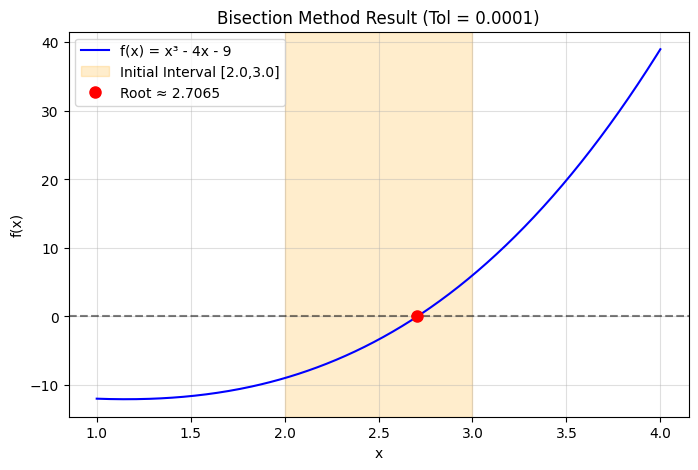

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function (you can change it here)
def f(x):
    return x**3 - 4*x - 9

# Bisection Method with recursion
def Bisection(a, b, tol):
    if f(a) * f(b) > 0:
        print("❌ No root found in this interval. f(a) and f(b) must have opposite signs.")
        return None

    c = (a + b) / 2
    if abs(f(c)) < tol or abs(b - a) < tol:
        return c
    elif f(a) * f(c) < 0:
        return Bisection(a, c, tol)
    else:
        return Bisection(c, b, tol)


# =============================
# Interactive Input Section
# =============================

print("=== Bisection Method Root Finder ===")
print("Function used: f(x) = x³ - 4x - 9\n")

try:
    a = float(input("Enter lower bound (a): "))
    b = float(input("Enter upper bound (b): "))
    tol = float(input("Enter tolerance (e.g., 0.0001): "))

    # Calculate root
    root = Bisection(a, b, tol)
    if root is not None:
        print(f"\n✅ Bisection Root = {root:.6f}")

        # Plot function and root
        x = np.linspace(a - 1, b + 1, 300)
        y = f(x)
        plt.figure(figsize=(8, 5))
        plt.plot(x, y, 'b-', label='f(x) = x³ - 4x - 9')
        plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        plt.axvspan(a, b, alpha=0.2, color='orange', label=f'Initial Interval [{a},{b}]')
        plt.plot(root, 0, 'ro', markersize=8, label=f'Root ≈ {root:.4f}')
        plt.title(f"Bisection Method Result (Tol = {tol})")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True, alpha=0.4)
        plt.legend()
        plt.show()

except ValueError:
    print("❌ Invalid input. Please enter numeric values.")
except Exception as e:
    print("⚠️ Error:", e)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function (you can modify this)
def f(x):
    return x**3 - 4*x - 9

# False Position (Regula Falsi) method
def false_position(a, b, tol, max_iter=1000):
    if f(a) * f(b) > 0:
        print("❌ No root found in this interval. f(a) and f(b) must have opposite signs.")
        return None
    
    iter_count = 0
    c_old = a
    while iter_count < max_iter:
        # Formula for False Position
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        if abs(f(c)) < tol or abs(c - c_old) < tol:
            return c
        
        # Update interval
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        
        c_old = c
        iter_count += 1

    print("⚠️ Maximum iterations reached. Method may not have converged.")
    return c

# =============================
# Interactive Input Section
# =============================

print("=== False Position (Regula Falsi) Method Root Finder ===")
print("Function used: f(x) = x³ - 4x - 9\n")

try:
    a = float(input("Enter lower bound (a): "))
    b = float(input("Enter upper bound (b): "))
    tol = float(input("Enter tolerance (e.g., 0.0001): "))

    root = false_position(a, b, tol)
    if root is not None:
        print(f"\n✅ False Position Root = {root:.6f}")

        # Plot function and root
        x = np.linspace(a - 1, b + 1, 300)
        y = f(x)
        plt.figure(figsize=(8, 5))
        plt.plot(x, y, 'g-', label='f(x) = x³ - 4x - 9')
        plt.axhline(0, color='black', linestyle='--', alpha=0.5)
        plt.axvspan(a, b, alpha=0.2, color='lightgreen', label=f'Initial Interval [{a},{b}]')
        plt.plot(root, 0, 'ro', markersize=8, label=f'Root ≈ {root:.4f}')
        plt.title(f"False Position Method Result (Tol = {tol})")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True, alpha=0.4)
        plt.legend()
        plt.show()

except ValueError:
    print("❌ Invalid input. Please enter numeric values.")
except Exception as e:
    print("⚠️ Error:", e)


=== False Position (Regula Falsi) Method Root Finder ===
Function used: f(x) = x³ - 4x - 9

❌ No root found in this interval. f(a) and f(b) must have opposite signs.
